In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import shutil

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style


In [3]:
data = pd.read_csv("csv/results.csv")

In [4]:
# Save the output as a variable that can be saved to a file
profile = data["Q02"].fillna(value="No answer").value_counts(dropna=False)
profile_percentage = data["Q02"].fillna(value="No answer").value_counts(normalize=True, dropna=False) * 100
print "Data:"
print profile
print ""
print "Data %:"
print profile_percentage

Data:
22.0         3
25.0         2
No answer    1
28.0         1
32.0         1
Name: Q02, dtype: int64

Data %:
22.0         37.5
25.0         25.0
No answer    12.5
28.0         12.5
32.0         12.5
Name: Q02, dtype: float64


In [5]:
data["Q02"].describe()

count     7.000000
mean     25.142857
std       3.760699
min      22.000000
25%      22.000000
50%      25.000000
75%      26.500000
max      32.000000
Name: Q02, dtype: float64

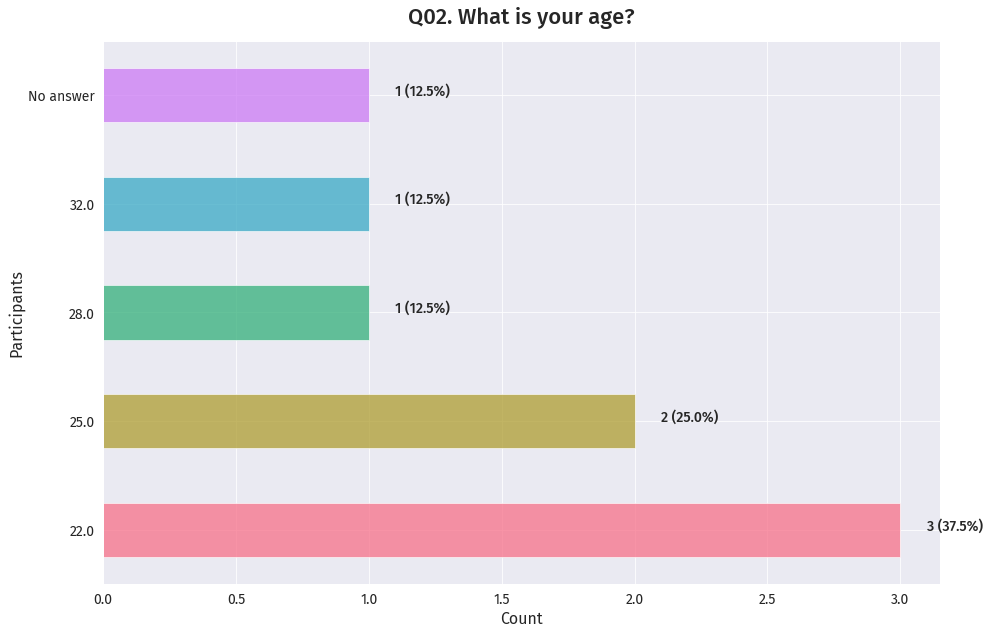

In [6]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")
# Plot the data
plt.figure(figsize=(8,6))
plt.xlabel('Count', fontsize=16)
plt.ylabel('Participants', fontsize=16)
plt.title("Q02. What is your age?", fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")
my_colors = sns.color_palette("husl", len(profile)) # Set color palette
profile = profile.sort_index()
profile.plot(kind='barh', color=my_colors, alpha=0.75, rot=0, figsize=(15,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i, v in enumerate(profile):
    plt.text(v + .1, i, str(v)+" ("+str(profile_percentage[i])+"%)", fontweight='500', fontsize=14)
plt.savefig("svg/Q02.svg", bbox_inches="tight")
plt.savefig("png/Q02.png", dpi=300, bbox_inches="tight")